### Pymaceuticals Inc.

## Analysis

The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. A lot of  observations from the data have been made, and Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.

First, a line graph was created to visualize mouse ID l159 tumor volume vs. time point when treated with Capomulin. as the graph shows, we can clearly see that after 20 days of treatment, tumor volume goes drasticaly down as timepoint goes up. This confirms the effectiveness of the Capomulin regimen. 
    
Secondly, there is a strong correlation between mouse weight and tumor volume, with a correlation coefficient of 0.84. This indicates that mouse weight may be contributing to the effectiveness of any drug regimen. This can be visualized with the scatter graph. As we can see on average, tumor volume and weight move toward the same direction. The scatter plot indicates a good linear relationship, which could be used to conduct a linear regression analysis and predict tumor volume at any given weight.

Lastly ,was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata,how='left', on= "Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
len(combined_data["Mouse ID"].value_counts())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data  = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_data

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data[combined_data["Mouse ID"]== 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data= combined_data.loc[combined_data['Mouse ID'] != "g989"]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].value_counts())

248

### Summary statistics

Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mean, median, variance, standard deviation, and SEM of the tumor volume

In [8]:
#First, let s group by Drug Regimen
grouped_drug = clean_data.groupby(["Drug Regimen"])
grouped_drug

#let's find the mean
drug_mean= grouped_drug.mean()['Tumor Volume (mm3)']

#let s find the median
drug_median= grouped_drug.median()['Tumor Volume (mm3)']
drug_median

#let s find the variance
drug_var = grouped_drug.var()['Tumor Volume (mm3)']
drug_var

#let s find the standard deviation
drug_std = grouped_drug.std()['Tumor Volume (mm3)']
drug_std

#let s find the SEM
drug_sem = grouped_drug.sem()['Tumor Volume (mm3)']
drug_sem

# # Assemble the resulting series into a single summary dataframe.
summary1 = pd.DataFrame({"Mean Tumor Volume": drug_mean , "Median Tumor Volume": drug_median, "Tumor Volume Variance": drug_var, "Tumor Volume Std. Dev":drug_std, "Tumor Volume Std. Err": drug_sem })
summary1


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary2 = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

### Bar and Pie Charts

Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

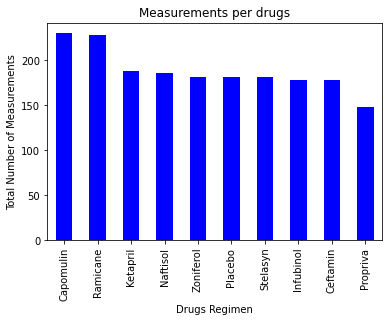

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#let's count the total number of measurements for each drugs
drug_count = clean_data['Drug Regimen'].value_counts()


# insert out x and y axis 
y_axis= drug_count.values
x_axis= drug_count.index

#let's plot the chart
drug_count.plot(kind="bar", facecolor='blue',)

#let's format the chart
plt.ylabel("Total Number of Measurements")
plt.xlabel("Drugs Regimen")
plt.title("Measurements per drugs")
plt.xticks(rotation=90)
plt.show()


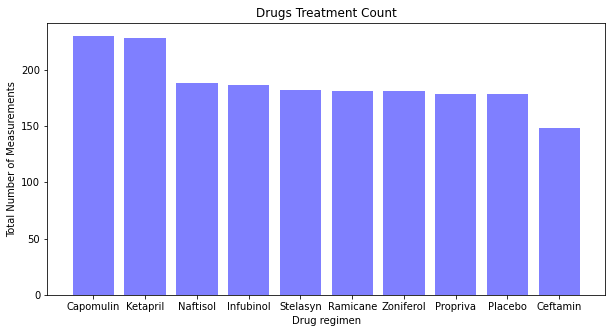

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot
#create list of drug for x_axis
drug_list = clean_data['Drug Regimen'].unique().tolist()
drug_list

#create count list for Y_axis
drug_count = clean_data['Drug Regimen'].value_counts().tolist()
drug_count

#assign axis
x_axis = drug_list
y_axis = drug_count

#Plot the chart
plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis, color='blue', alpha=0.5, align="center")

plt.ylabel("Total Number of Measurements")
plt.xlabel("Drug regimen")
plt.title("Drugs Treatment Count")
plt.show()

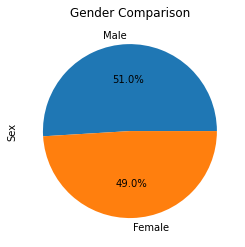

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = clean_data["Sex"].value_counts()
sex_count

#color of 
colors=["blue", "orange"]

#Create the pie based upon the values above
sex_count.plot(kind="pie",autopct="%1.1f%%")

#Formatting
plt.title("Gender Comparison")
plt.ylabel("Sex")
plt.show()

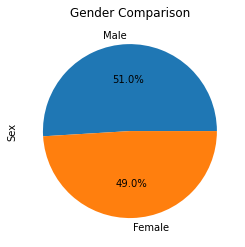

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_count =clean_data["Sex"].value_counts()

#Labels for each section of our pie chart
labels= sex_count.index

#Values of each section of our pie chart
sizes= sex_count.values

#Colors of each section
colors=["blue", "orange"]

# let's create our pie chart using pandas
plt.pie(sizes, labels=labels, autopct="%1.1f%%")

#Formatting
plt.title("Gender Comparison")
plt.ylabel("Sex")
plt.show()


### Quartiles, Outliers and Boxplots

Calculate the final tumor volume of each mouse across four of the treatment regimens:  
Capomulin, Ramicane, Infubinol, and Ceftamin

In [14]:

# Start by getting the last (greatest) timepoint for each mouse
max_time = clean_data.groupby(["Mouse ID"]).max()['Timepoint']
max_time

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_time = max_time.reset_index()
max_time
merge_columns = pd.merge(max_time, clean_data ,how='left', on= ["Mouse ID","Timepoint"])
merge_columns

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# set up lists to hold volume info
t_volume = []
# Loop through the list 
for drugs in drug_list:
    tumor_volume = merge_columns.loc[merge_columns["Drug Regimen"]== drugs]['Tumor Volume (mm3)']
    t_volume.append(tumor_volume)
    #print(drugs, tumor_volume)
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = tumor_volume.loc[(tumor_volume<lower_bound)|(tumor_volume>upper_bound)]
    print(drugs, outlier)

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


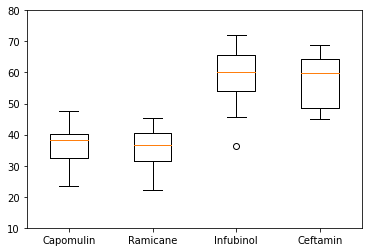

In [16]:
# Generate a box plot of the final tumor volume across four regimens of interest
plt.boxplot(t_volume, labels= drug_list)
plt.ylim(10, 80)
plt.savefig('Boxchart: Total tumor volume')
plt.show()

### Line and Scatter Plots

Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

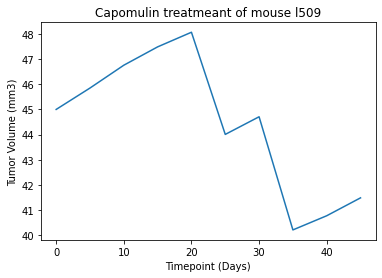

In [17]:
#let s get all data for Mouse l509
mouse_df = clean_data.loc[clean_data["Mouse ID"]== "l509",:]
mouse_df.head()
# Create the plot
x_axis = mouse_df["Timepoint"]
y_axis = mouse_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

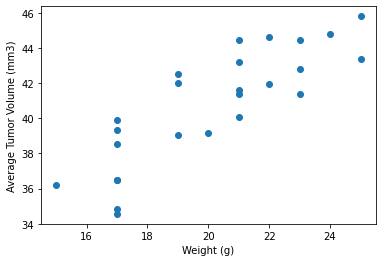

In [18]:
# First grab all data for Capomulin drug
Capomulin_df = clean_data.loc[clean_data["Drug Regimen"]== "Capomulin",:]
Capomulin_df

# Get the average of all data
Capomulin_avg = Capomulin_df.groupby(['Mouse ID']).mean()
Capomulin_avg

# create scatter plot of average tumor volume and mouse weight
plt.scatter(Capomulin_avg['Weight (g)'],Capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

### Correlation and Regression

Calculate the correlation coefficient and linear regression model 
for mouse weight and average tumor volume for the Capomulin regimen

The linear regression model is : LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)
The correlation between mouse weight and average tumor volume is 0.84


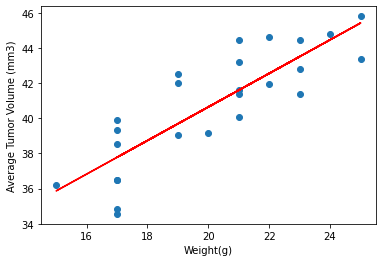

In [19]:
# Calculate the correlation coefficient
correlation =round(st.pearsonr(Capomulin_avg['Weight (g)'],Capomulin_avg['Tumor Volume (mm3)'])[0],2)

# Create model to get lineear regression equation parameters
model=st.linregress(Capomulin_avg['Weight (g)'],Capomulin_avg['Tumor Volume (mm3)'])
model

# Store slope and intercept
slope = 0.9544396890241045
intercept = 21.552160532685015

# Add the linear regression line to the scatter plot 
y_values = Capomulin_avg['Weight (g)']*slope+intercept
plt.scatter(Capomulin_avg['Weight (g)'],Capomulin_avg['Tumor Volume (mm3)'])
plt.plot(Capomulin_avg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')

#print and show results
print(f"The linear regression model is : {model}")
print(f"The correlation between mouse weight and average tumor volume is {correlation}")
plt.show()